In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define paths
train_path = "/content/drive/My Drive/Computer_Vision/Project/vision project/No Augmentation/training_data"
test_path = "/content/drive/My Drive/Computer_Vision/Project/vision project/No Augmentation/testing_data"

# Function to load and preprocess images from a folder
def load_images_from_folder(folder):
    images, user_labels, word_labels = [], [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img)
            parts = filename.split('_')
            user_label = parts[0]
            word_label = parts[2]
            user_labels.append(user_label)
            word_labels.append(word_label)
        else:
            print(f"[WARNING] Failed to load image: {img_path}")
    print(f"[DEBUG] Loaded {len(images)} images from {folder}")
    print(f"[DEBUG] User Labels: {set(user_labels)}")
    print(f"[DEBUG] Word Labels: {set(word_labels)}")
    return np.array(images), np.array(user_labels), np.array(word_labels)

# Load data
train_images, train_user_labels, train_word_labels = load_images_from_folder(train_path)
test_images, test_user_labels, test_word_labels = load_images_from_folder(test_path)

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN input
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Encode user labels
label_encoder = LabelEncoder()
train_user_labels_encoded = to_categorical(label_encoder.fit_transform(train_user_labels))
test_user_labels_encoded = to_categorical(label_encoder.transform(test_user_labels))

# CNN Architectures
def build_basic_cnn(output_units):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(output_units, activation='softmax')
    ])
    return model

def build_intermediate_cnn(output_units):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(output_units, activation='softmax')
    ])
    return model

def build_advanced_cnn(output_units):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(output_units, activation='softmax')
    ])
    return model

# Compile, train, and plot function
def compile_and_train(model, model_name, learning_rate=0.001, epochs=10, batch_size=32):
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(f"Training {model_name}...")
    history = model.fit(train_images, train_user_labels_encoded,
                        epochs=epochs, batch_size=batch_size, validation_split=0.2)

    # Plot training loss and accuracy
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_images, test_user_labels_encoded)
    print(f"{model_name} Test Accuracy: {test_accuracy * 100:.2f}%")
    return history

# Determine the number of unique user labels
output_units = len(np.unique(train_user_labels))

# Initialize and compile the models
basic_model = build_basic_cnn(output_units)
intermediate_model = build_intermediate_cnn(output_units)
advanced_model = build_advanced_cnn(output_units)

# Train and evaluate all models
hist_basic = compile_and_train(basic_model, "Basic CNN")
hist_intermediate = compile_and_train(intermediate_model, "Intermediate CNN")
hist_advanced = compile_and_train(advanced_model, "Advanced CNN")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Advanced CNN 2...
Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.0150 - loss: 6.5026 - val_accuracy: 0.0000e+00 - val_loss: 9.9854
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.0121 - loss: 4.3346 - val_accuracy: 0.0000e+00 - val_loss: 5.1000
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.0121 - loss: 4.3007 - val_accuracy: 0.0000e+00 - val_loss: 5.3776
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.0153 - loss: 4.2719 - val_accuracy: 0.0000e+00 - val_loss: 5.6172
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.0118 - loss: 4.2489 - val_accuracy: 0.0000e+00 - val_loss: 5.8281
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.0118 - loss: 4.2392 - val_accuracy: 0.0000e+00 - val_loss: 6.0119
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.0128 - loss: 4.2498 - val_accuracy: 0.0000e+00 - val_loss: 6.1763
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - acc

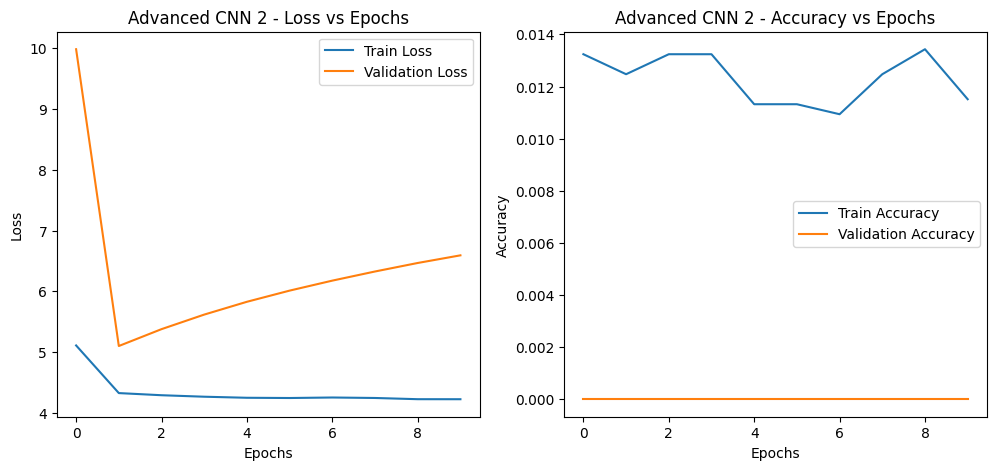

51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.0365 - loss: 4.3681
Advanced CNN 2 Test Accuracy: 1.23%


In [ ]:

def build_advanced_cnn_2(output_units):
    model = models.Sequential([
        # First convolution block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        # Second convolution block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        # Third convolution block
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        # Fourth convolution block
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        # Flattening followed by dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(output_units, activation='softmax')
    ])
    return model

advanced_model_2 = build_advanced_cnn_2(output_units)

hist_advanced = compile_and_train(model=advanced_model_2, model_name="Advanced CNN 2", learning_rate=0.005, epochs=10, batch_size=64)

[DEBUG] Loaded 6515 images from /content/drive/My Drive/Computer_Vision/Project/vision project/No Augmentation/training_data
[DEBUG] User Labels: {'user056', 'user072', 'user017', 'user070', 'user001', 'user060', 'user082', 'user061', 'user066', 'user064', 'user026', 'user023', 'user045', 'user002', 'user030', 'user077', 'user024', 'user012', 'user074', 'user019', 'user036', 'user008', 'user032', 'user078', 'user076', 'user065', 'user048', 'user050', 'user034', 'user005', 'user052', 'user006', 'user059', 'user035', 'user037', 'user051', 'user053', 'user021', 'user009', 'user004', 'user081', 'user029', 'user080', 'user025', 'user049', 'user046', 'user022', 'user010', 'user039', 'user013', 'user033', 'user016', 'user014', 'user003', 'user058', 'user067', 'user041', 'user027', 'user055', 'user043', 'user063', 'user015', 'user020', 'user071', 'user044', 'user028', 'user011', 'user068', 'user031', 'user042', 'user062', 'user040', 'user054', 'user038', 'user073', 'user075', 'user018', 'user0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Basic CNN...
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.0085 - loss: 4.4863 - val_accuracy: 0.0000e+00 - val_loss: 4.5417
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.0131 - loss: 4.3688 - val_accuracy: 0.0000e+00 - val_loss: 4.6742
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.0135 - loss: 4.3442 - val_accuracy: 0.0000e+00 - val_loss: 4.8005
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.0118 - loss: 4.3247 - val_accuracy: 0.0000e+00 - val_loss: 4.9210
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.0143 - loss: 4.3085 - val_accuracy: 0.0000e+00 - val_loss: 5.0360
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.0151 - loss: 4.2942 - val_accuracy: 0.0000e+00 - val_loss: 5.1462
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.0106 - loss: 4.2831 - val_accuracy: 0.0000e+00 - val_loss: 5.2515
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 

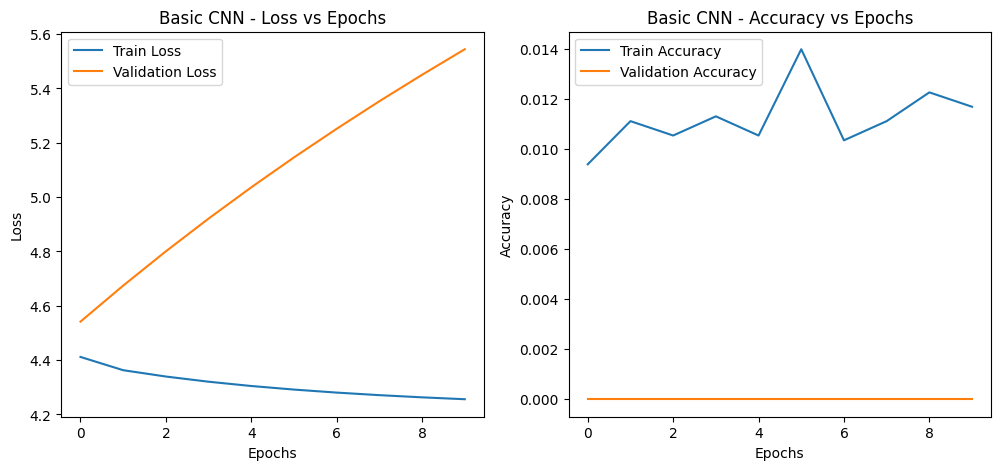

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0013 - loss: 4.3358    
Basic CNN Test Accuracy: 1.23%
Training Intermediate CNN...
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 198ms/step - accuracy: 0.0152 - loss: 4.4302 - val_accuracy: 0.0000e+00 - val_loss: 5.6692
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - accuracy: 0.0155 - loss: 4.2791 - val_accuracy: 0.0015 - val_loss: 6.3494
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 32s 198ms/step - accuracy: 0.0278 - loss: 4.1828 - val_accuracy: 0.0015 - val_loss: 8.8031
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 32s 197ms/step - accuracy: 0.0576 - loss: 3.9380 - val_accuracy: 0.0000e+00 - val_loss: 8.6205
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - accuracy: 0.0775 - loss: 3.7176 - val_accuracy: 7.6746e-04 - val_loss: 11.5286
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.1005 - loss: 3.5480 - val_accuracy: 0.0031 - val_loss: 11.9281
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 196ms/step - accur

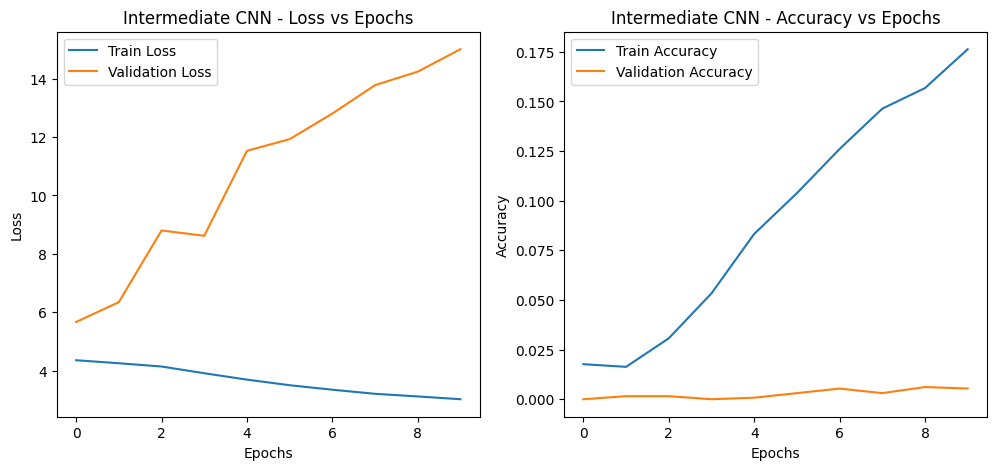

51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.2544 - loss: 3.7028
Intermediate CNN Test Accuracy: 22.22%
Training Advanced CNN...
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 134s 808ms/step - accuracy: 0.0121 - loss: 4.3632 - val_accuracy: 0.0000e+00 - val_loss: 5.8831
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 819ms/step - accuracy: 0.0124 - loss: 4.2477 - val_accuracy: 0.0000e+00 - val_loss: 6.8034
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 132s 812ms/step - accuracy: 0.0171 - loss: 4.2253 - val_accuracy: 7.6746e-04 - val_loss: 7.9947
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 131s 805ms/step - accuracy: 0.0452 - loss: 4.0234 - val_accuracy: 0.0015 - val_loss: 11.5715
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 815ms/step - accuracy: 0.0978 - loss: 3.5709 - val_accuracy: 0.0031 - val_loss: 12.3731
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 813ms/step - accuracy: 0.1402 - loss: 3.2157 - val_accuracy: 0.0023 - val_loss: 14.5997
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 130s 800ms/step

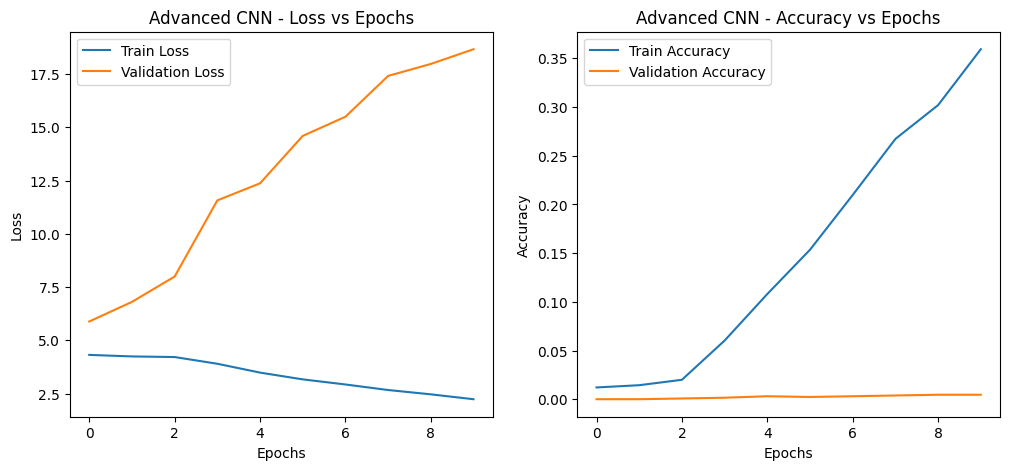

51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - accuracy: 0.3967 - loss: 3.2728
Advanced CNN Test Accuracy: 34.13%


In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define paths
train_path = "/content/drive/My Drive/Computer_Vision/Project/vision project/No Augmentation/training_data"
test_path = "/content/drive/My Drive/Computer_Vision/Project/vision project/No Augmentation/testing_data"

# Function to load and preprocess images from a folder
def load_images_from_folder(folder):
    images, user_labels, word_labels = [], [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img)
            parts = filename.split('_')
            user_label = parts[0]
            word_label = parts[2]
            user_labels.append(user_label)
            word_labels.append(word_label)
        else:
            print(f"[WARNING] Failed to load image: {img_path}")
    print(f"[DEBUG] Loaded {len(images)} images from {folder}")
    print(f"[DEBUG] User Labels: {set(user_labels)}")
    print(f"[DEBUG] Word Labels: {set(word_labels)}")
    return np.array(images), np.array(user_labels), np.array(word_labels)

# Load data
train_images, train_user_labels, train_word_labels = load_images_from_folder(train_path)
test_images, test_user_labels, test_word_labels = load_images_from_folder(test_path)

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN input
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Encode user labels
label_encoder = LabelEncoder()
train_user_labels_encoded = to_categorical(label_encoder.fit_transform(train_user_labels))
test_user_labels_encoded = to_categorical(label_encoder.transform(test_user_labels))

# CNN Architectures
def build_basic_cnn(output_units):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(output_units, activation='softmax')
    ])
    return model

def build_intermediate_cnn(output_units):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(output_units, activation='softmax')
    ])
    return model

def build_advanced_cnn(output_units):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(output_units, activation='softmax')
    ])
    return model

# Compile, train, and plot function
def compile_and_train(model, model_name, learning_rate=0.001, epochs=10, batch_size=32):
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(f"Training {model_name}...")
    history = model.fit(train_images, train_user_labels_encoded,
                        epochs=epochs, batch_size=batch_size, validation_split=0.2)

    # Plot training loss and accuracy
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_images, test_user_labels_encoded)
    print(f"{model_name} Test Accuracy: {test_accuracy * 100:.2f}%")
    return history

# Determine the number of unique user labels
output_units = len(np.unique(train_user_labels))

# Initialize and compile the models
basic_model = build_basic_cnn(output_units)
intermediate_model = build_intermediate_cnn(output_units)
advanced_model = build_advanced_cnn(output_units)

# Train and evaluate all models
hist_basic = compile_and_train(basic_model, "Basic CNN")
hist_intermediate = compile_and_train(intermediate_model, "Intermediate CNN")
hist_advanced = compile_and_train(advanced_model, "Advanced CNN")


# Task 2

[DEBUG] Loaded 22800 images from /content/drive/My Drive/Computer_Vision/Project/augmented_training_organized
[DEBUG] User Labels: {'user056', 'user072', 'user017', 'user070', 'user001', 'user060', 'user082', 'user061', 'user066', 'user064', 'user026', 'user023', 'user045', 'user002', 'user030', 'user077', 'user024', 'user012', 'user074', 'user019', 'user036', 'user008', 'user032', 'user078', 'user076', 'user065', 'user048', 'user050', 'user034', 'user005', 'user006', 'user052', 'user059', 'user035', 'user037', 'user051', 'user053', 'user021', 'user009', 'user004', 'user081', 'user029', 'user080', 'user025', 'user049', 'user046', 'user022', 'user013', 'user039', 'user010', 'user033', 'user016', 'user014', 'user003', 'user058', 'user067', 'user041', 'user027', 'user055', 'user043', 'user063', 'user015', 'user020', 'user071', 'user044', 'user028', 'user011', 'user068', 'user031', 'user042', 'user062', 'user040', 'user054', 'user038', 'user073', 'user075', 'user018', 'user047', 'user007',

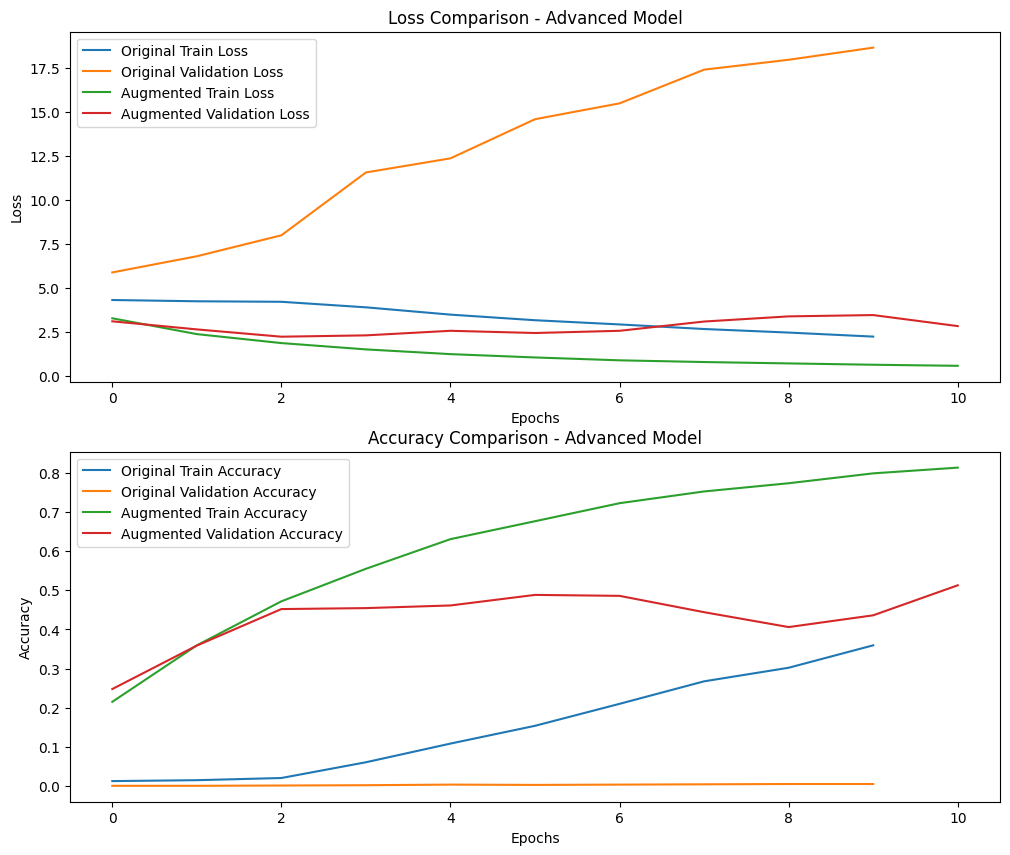

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os


# Define paths
train_path = "/content/drive/My Drive/Computer_Vision/Project/augmented_training_organized"
test_path = "/content/drive/My Drive/Computer_Vision/Project/testing_organized"
validation_path = "/content/drive/My Drive/Computer_Vision/Project/validation_organized"

# Function to load and preprocess images from a folder
def load_images_from_folder(base_folder):
    images, user_labels, word_labels = [], [], []
    # Iterate over each user folder in the base directory
    for user_folder in os.listdir(base_folder):
        user_path = os.path.join(base_folder, user_folder)
        if os.path.isdir(user_path):  # Check if it is a directory
            for filename in os.listdir(user_path):
                img_path = os.path.join(user_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale
                if img is not None:
                    img = cv2.resize(img, (64, 64))  # Resize to 64x64
                    images.append(img)
                    # Extract user and word labels from the filename
                    parts = filename.split('_')
                    user_label = user_folder  # Directory name is the user label
                    word_label = parts[1]  # Assuming 'word' is the second part of the filename
                    user_labels.append(user_label)
                    word_labels.append(word_label)
                else:
                    print(f"[WARNING] Failed to load image: {img_path}")
        else:
            print(f"[WARNING] {user_path} is not a directory.")
    print(f"[DEBUG] Loaded {len(images)} images from {base_folder}")
    print(f"[DEBUG] User Labels: {set(user_labels)}")
    print(f"[DEBUG] Word Labels: {set(word_labels)}")
    return np.array(images), np.array(user_labels), np.array(word_labels)



# Load augmented training, testing, and validation data
aug_train_images, aug_train_user_labels, _ = load_images_from_folder(train_path)
aug_test_images, aug_test_user_labels, _ = load_images_from_folder(test_path)
aug_val_images, aug_val_user_labels, _ = load_images_from_folder(validation_path)

# Normalize images
aug_train_images = aug_train_images / 255.0
aug_test_images = aug_test_images / 255.0
aug_val_images = aug_val_images / 255.0

# Reshape for CNN input
aug_train_images = aug_train_images[..., np.newaxis]
aug_test_images = aug_test_images[..., np.newaxis]
aug_val_images = aug_val_images[..., np.newaxis]

# Encode user labels
label_encoder = LabelEncoder()  # Assuming you are continuing from the same label encoding setup
aug_train_user_labels_encoded = to_categorical(label_encoder.fit_transform(aug_train_user_labels))
aug_test_user_labels_encoded = to_categorical(label_encoder.transform(aug_test_user_labels))
aug_val_user_labels_encoded = to_categorical(label_encoder.transform(aug_val_user_labels))


# Assuming the advanced_model has been defined and compiled previously
# Re-compiling is necessary only if the setup has changed since last compile
advanced_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Training on augmented data
history_augmented_advanced = advanced_model.fit(
    aug_train_images, aug_train_user_labels_encoded,
    validation_data=(aug_val_images, aug_val_user_labels_encoded),
    epochs=11,
    batch_size=32
)

# Evaluate on augmented test data
test_loss_augmented, test_accuracy_augmented = advanced_model.evaluate(
    aug_test_images, aug_test_user_labels_encoded)
print(f"Augmented Test Accuracy: {test_accuracy_augmented * 100:.2f}%")


# Ensure this part runs after both training sessions
plt.figure(figsize=(12, 10))

# Loss comparison
plt.subplot(2, 1, 1)
plt.plot(hist_advanced.history['loss'], label='Original Train Loss')
plt.plot(hist_advanced.history['val_loss'], label='Original Validation Loss')
plt.plot(history_augmented_advanced.history['loss'], label='Augmented Train Loss')
plt.plot(history_augmented_advanced.history['val_loss'], label='Augmented Validation Loss')
plt.title('Loss Comparison - Advanced Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy comparison
plt.subplot(2, 1, 2)
plt.plot(hist_advanced.history['accuracy'], label='Original Train Accuracy')
plt.plot(hist_advanced.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(history_augmented_advanced.history['accuracy'], label='Augmented Train Accuracy')
plt.plot(history_augmented_advanced.history['val_accuracy'], label='Augmented Validation Accuracy')
plt.title('Accuracy Comparison - Advanced Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



[DEBUG] Loaded 6515 images from /content/drive/My Drive/Computer_Vision/Project/vision project/No Augmentation/training_data
[DEBUG] User Labels: {'user071', 'user067', 'user055', 'user068', 'user004', 'user021', 'user046', 'user022', 'user010', 'user070', 'user060', 'user013', 'user041', 'user047', 'user077', 'user001', 'user024', 'user019', 'user018', 'user078', 'user043', 'user053', 'user045', 'user016', 'user036', 'user031', 'user020', 'user014', 'user062', 'user069', 'user052', 'user066', 'user007', 'user050', 'user076', 'user026', 'user058', 'user037', 'user012', 'user035', 'user034', 'user056', 'user059', 'user042', 'user009', 'user002', 'user005', 'user017', 'user028', 'user049', 'user080', 'user075', 'user008', 'user003', 'user027', 'user044', 'user038', 'user082', 'user061', 'user039', 'user081', 'user025', 'user032', 'user051', 'user023', 'user011', 'user064', 'user030', 'user079', 'user040', 'user015', 'user065', 'user057', 'user029', 'user048', 'user074', 'user063', 'user0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Basic CNN...
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 97ms/step - accuracy: 0.0142 - loss: 4.4999 - val_accuracy: 0.0000e+00 - val_loss: 4.5435
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.0143 - loss: 4.3686 - val_accuracy: 0.0000e+00 - val_loss: 4.6765
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.0152 - loss: 4.3441 - val_accuracy: 0.0000e+00 - val_loss: 4.8035
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.0119 - loss: 4.3238 - val_accuracy: 0.0000e+00 - val_loss: 4.9242
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.0126 - loss: 4.3078 - val_accuracy: 0.0000e+00 - val_loss: 5.0395


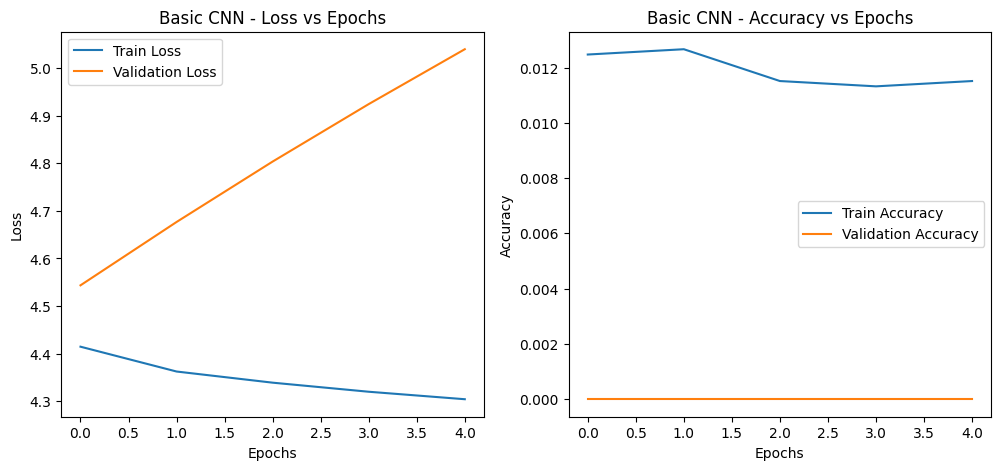

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0295 - loss: 4.3440
Basic CNN Test Accuracy: 1.23%


In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define paths
train_path = "/content/drive/My Drive/Computer_Vision/Project/vision project/No Augmentation/training_data"
test_path = "/content/drive/My Drive/Computer_Vision/Project/vision project/No Augmentation/testing_data"

# Function to load and preprocess images from a folder
def load_images_from_folder(folder):
    images, user_labels, word_labels = [], [], []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img)
            parts = filename.split('_')
            user_label = parts[0]
            word_label = parts[2]
            user_labels.append(user_label)
            word_labels.append(word_label)
        else:
            print(f"[WARNING] Failed to load image: {img_path}")
    print(f"[DEBUG] Loaded {len(images)} images from {folder}")
    print(f"[DEBUG] User Labels: {set(user_labels)}")
    print(f"[DEBUG] Word Labels: {set(word_labels)}")
    return np.array(images), np.array(user_labels), np.array(word_labels)

# Load data
train_images, train_user_labels, train_word_labels = load_images_from_folder(train_path)
test_images, test_user_labels, test_word_labels = load_images_from_folder(test_path)

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN input
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

# Encode user labels
label_encoder = LabelEncoder()
train_user_labels_encoded = to_categorical(label_encoder.fit_transform(train_user_labels))
test_user_labels_encoded = to_categorical(label_encoder.transform(test_user_labels))

# CNN Architectures
def build_basic_cnn(output_units):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(output_units, activation='softmax')
    ])
    return model

# Compile, train, and plot function
def compile_and_train(model, model_name, learning_rate=0.001, epochs=10, batch_size=32):
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(f"Training {model_name}...")
    history = model.fit(train_images, train_user_labels_encoded,
                        epochs=epochs, batch_size=batch_size, validation_split=0.2)

    # Plot training loss and accuracy
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_images, test_user_labels_encoded)
    print(f"{model_name} Test Accuracy: {test_accuracy * 100:.2f}%")
    return history

# Determine the number of unique user labels
output_units = len(np.unique(train_user_labels))

# Initialize and compile the models
basic_model = build_basic_cnn(output_units)


# Train and evaluate all models
hist_basic = compile_and_train(model=basic_model, model_name="Basic CNN", epochs=5)

